## Gender Clasification Model

Import libraries

In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

Create a function to load the images, resize them, convert them to an array and flatten them

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((400, 600))  # Resize to a common size
        img = np.array(img)
        images.append(img.flatten())  # Flatten the image data
        if "female" in folder:
            labels.append(1)
        else:
            labels.append(0)
    return images, labels

The function is used with female and male images

In [3]:
male_images, male_labels = load_images_from_folder('pictures_dataset/raw/male/')
female_images, female_labels = load_images_from_folder('pictures_dataset/raw/female/')

## Combine male and female data
#X = male_images + female_images
#y = male_labels + female_labels

In [37]:
X_train_males, X_test_males, y_train_males, y_test_males = train_test_split(male_images, male_labels, test_size=0.2, random_state=42)
X_train_females, X_test_females, y_train_females, y_test_females = train_test_split(female_images, female_labels, test_size=0.2, random_state=42)

In [38]:
# Combine male and female data
X_train=X_train_males+X_train_females
X_test=X_test_males+X_test_females
y_train=y_train_males+y_train_females
y_test=y_test_males+y_test_females

The information is divided to train the model and test it

"<font color="red">The model is trained with 80% of the data and testes with the another 20%</font>"

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(len(X_train+X_test))
print(len(X_train))

474
378


Choose the best K

"<font color="red">The model is trained with 80% of the data and the model is used without changing the parameters</font>"

Text(0.5, 1.0, 'Confusion Matrix with K=1')

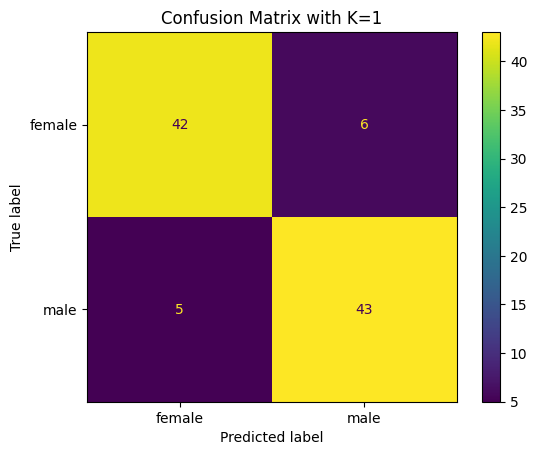

In [40]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
con=confusion_matrix(y_test,pred)
cmd = ConfusionMatrixDisplay(con, display_labels=['female','male'])
cmd.plot()
plt.title("Confusion Matrix with K=1")

In [41]:
# printing precision,recall,accuracy score etc
print("Metrics of the model with K=1")
print(classification_report(y_test,pred))

Metrics of the model with K=1
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.88      0.90      0.89        48

    accuracy                           0.89        96
   macro avg       0.89      0.89      0.89        96
weighted avg       0.89      0.89      0.89        96



Try different values to find the best K

In [42]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

print(len(error_rate))
error_rate

30


[0.11458333333333333,
 0.125,
 0.10416666666666667,
 0.13541666666666666,
 0.13541666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.15625,
 0.125,
 0.13541666666666666,
 0.13541666666666666,
 0.125,
 0.10416666666666667,
 0.125,
 0.11458333333333333,
 0.13541666666666666,
 0.11458333333333333,
 0.14583333333333334,
 0.125,
 0.15625,
 0.15625,
 0.15625,
 0.13541666666666666,
 0.15625,
 0.14583333333333334,
 0.15625,
 0.14583333333333334,
 0.14583333333333334,
 0.14583333333333334,
 0.14583333333333334]

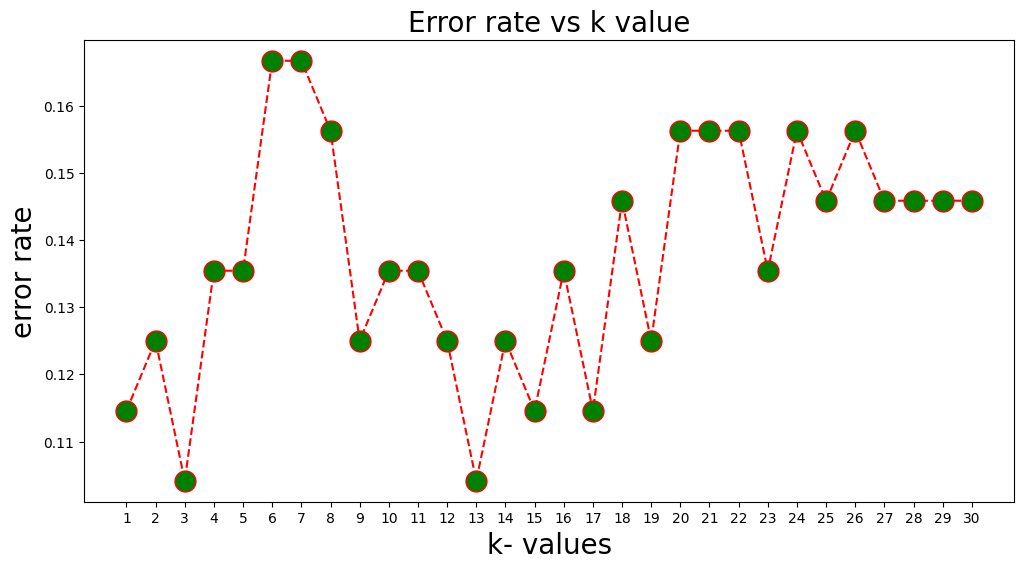

In [43]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

Text(0.5, 1.0, 'Confusion Matrix with K=3')

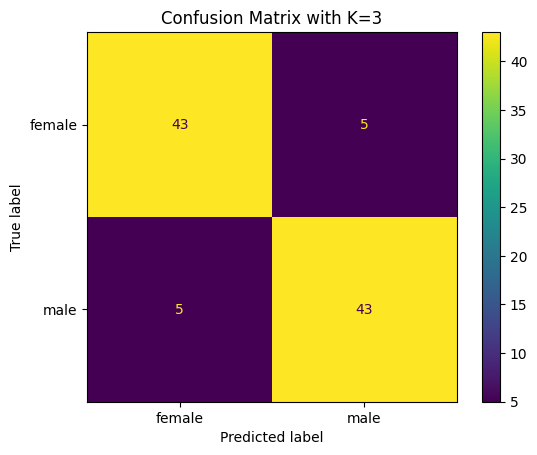

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
predicted_value=knn_model.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
cmd_3 = ConfusionMatrixDisplay(con_mat, display_labels=['female','male'])
cmd_3.plot()
plt.title("Confusion Matrix with K=3")

In [45]:
# printing precision,recall,accuracy score etc
print("Metrics of the model with K=3")
print(classification_report(y_test,predicted_value))

Metrics of the model with K=3
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        48
           1       0.90      0.90      0.90        48

    accuracy                           0.90        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96



In [46]:
# printing precision,recall,accuracy score etc
print(con)
print(classification_report(y_test,pred))

[[42  6]
 [ 5 43]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.88      0.90      0.89        48

    accuracy                           0.89        96
   macro avg       0.89      0.89      0.89        96
weighted avg       0.89      0.89      0.89        96



Se concluye que el mejor valor para K es 3 sin modificar los parámetros

In [47]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("test_new_pictures/female")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
female=0
for i, prediction in enumerate(test_predictions):
    if prediction==0:
        gender="Male"
    else:
        gender="Female"
        female+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=female/len(test_predictions)


print("Number of clasifications as females = ", female)
print("Real number of females = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as females =  214
Real number of females =  236
Number of pictures with good clasification =  0.9067796610169492


In [48]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("test_new_pictures/male")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
male=0
for i, prediction in enumerate(test_predictions):
    if prediction==1:
        gender="Female"
    else:
        gender="Male"
        male+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=male/len(test_predictions)


print("Number of clasifications as males = ", male)
print("Real number of males = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as males =  160
Real number of males =  238
Number of pictures with good clasification =  0.6722689075630253


Observation:

As can be seen, the % accuracy of the model for both genders is 86%. No parameters were modified here, keeping in mind that the model is using a uniform weight for the calculation, where all the weights of the neighbors are weighted equally.

"<font color="red">The model is trained with 80% of the data and the model is used by changing the weight parameter. The parameter changes from uniform to distance</font>"

In [49]:
k = 3  # Number of neighbors (you can tune this hyperparameter)
knn_model = KNeighborsClassifier(n_neighbors=k,
                                 weights='distance') #Hacer que el modelo tenga en cuenta pesos por distancia
                                
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [50]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Male", "Female"])

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

Accuracy: 89.58%
Classification Report:
               precision    recall  f1-score   support

        Male       0.90      0.90      0.90        48
      Female       0.90      0.90      0.90        48

    accuracy                           0.90        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96



In [51]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("test_new_pictures/female")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
female=0
for i, prediction in enumerate(test_predictions):
    if prediction==0:
        gender="Male"
    else:
        gender="Female"
        female+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=female/len(test_predictions)


print("Number of clasifications as females = ", female)
print("Real number of females = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as females =  231
Real number of females =  236
Number of pictures with good clasification =  0.9788135593220338


In [52]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("test_new_pictures/male")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
male=0
for i, prediction in enumerate(test_predictions):
    if prediction==1:
        gender="Female"
    else:
        gender="Male"
        male+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=male/len(test_predictions)


print("Number of clasifications as males = ", male)
print("Real number of males = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as males =  160
Real number of males =  238
Number of pictures with good clasification =  0.6722689075630253


Observation:

As can be seen, the % accuracy of the model for both genders is 96.62%. No parameters were modified here, keeping in mind that the model is using a uniform weight for the calculation, where all the weights of the neighbors are weighted equally.

"<font color="red">The model is trained with 80% of the data and the model is used by changing the weight parameter. The parameter changes from uniform to distance and the Manhattan distance is used.</font>"

In [53]:
k = 3  # Number of neighbors (you can tune this hyperparameter)
knn_model = KNeighborsClassifier(n_neighbors=k,
                                 weights='distance', #Hacer que el modelo tenga en cuenta pesos por distancia
                                 p=1) #Manhattan distance
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [54]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Male", "Female"])

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

Accuracy: 90.62%
Classification Report:
               precision    recall  f1-score   support

        Male       0.93      0.88      0.90        48
      Female       0.88      0.94      0.91        48

    accuracy                           0.91        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.91      0.91      0.91        96



In [55]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("test_new_pictures/female")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
female=0
for i, prediction in enumerate(test_predictions):
    if prediction==0:
        gender="Male"
    else:
        gender="Female"
        female+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=female/len(test_predictions)


print("Number of clasifications as females = ", female)
print("Real number of females = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as females =  233
Real number of females =  236
Number of pictures with good clasification =  0.9872881355932204


In [56]:
# Test the model on new images in a test folder
test_data, test_labels = load_images_from_folder("test_new_pictures/male")
test_predictions = knn_model.predict(test_data)

# Print the predictions for the test images
male=0
for i, prediction in enumerate(test_predictions):
    if prediction==1:
        gender="Female"
    else:
        gender="Male"
        male+=1
    
    
    #print(f"Test Image {i + 1}: Predicted Gender - {gender}")

accuracy=male/len(test_predictions)


print("Number of clasifications as males = ", male)
print("Real number of males = ", len(test_predictions))
print("Number of pictures with good clasification = ", accuracy)

Number of clasifications as males =  130
Real number of males =  238
Number of pictures with good clasification =  0.5462184873949579


Observation:

As can be seen, the % accuracy of the model for both genders is 96.62%. No parameters were modified here, keeping in mind that the model is using a uniform weight for the calculation, where all the weights of the neighbors are weighted equally.